In [199]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [200]:
# Reading the dataset
import pandas as pd
import numpy as np
Data=pd.read_csv(r'C:\Users\SAYAN\Desktop\musk_csv.csv', encoding='latin')
print('Shape before deleting duplicate values:', Data.shape)

# Removing duplicate rows if any
Data=Data.drop_duplicates()
print('Shape After deleting duplicate values:', Data.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
Data.head(10)

Shape before deleting duplicate values: (6598, 170)
Shape After deleting duplicate values: (6598, 170)


,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
5,6,MUSK-211,211_1+14,46,-194,-145,28,-117,72,57,...,-138,-156,56,143,142,164,-67,-145,40,1
6,7,MUSK-211,211_1+15,47,-199,-106,28,-117,73,27,...,-133,-153,55,144,142,165,-68,-145,37,1
7,8,MUSK-211,211_1+16,41,-199,-101,22,-117,-6,26,...,-59,-1,50,100,135,169,-60,-135,81,1
8,9,MUSK-211,211_1+17,41,-199,-101,22,-117,-6,26,...,-59,-1,50,100,135,169,-60,-135,81,1
9,10,MUSK-211,211_1+18,47,-199,-106,28,-117,73,27,...,-133,-153,55,144,142,165,-68,-146,37,1


# Looking at the distribution of Target variable

<AxesSubplot:xlabel='class'>

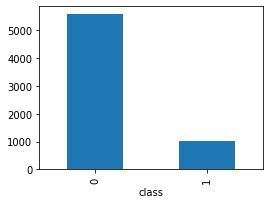

In [201]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=Data.groupby('class').size()
GroupedData.plot(kind='bar', figsize=(4,3))

# Basic Data Exploration

In [202]:
Data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [203]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


# Removal of unwanted features

In [204]:
UselessColumns = ['ID','molecule_name','conformation_name']
Data = Data.drop(UselessColumns,axis=1)
Data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


# Checking Null values

In [205]:
Data.isnull().sum()

f1       0
f2       0
f3       0
f4       0
f5       0
        ..
f163     0
f164     0
f165     0
f166     0
class    0
Length: 167, dtype: int64

# Plotting the distribution of each feature

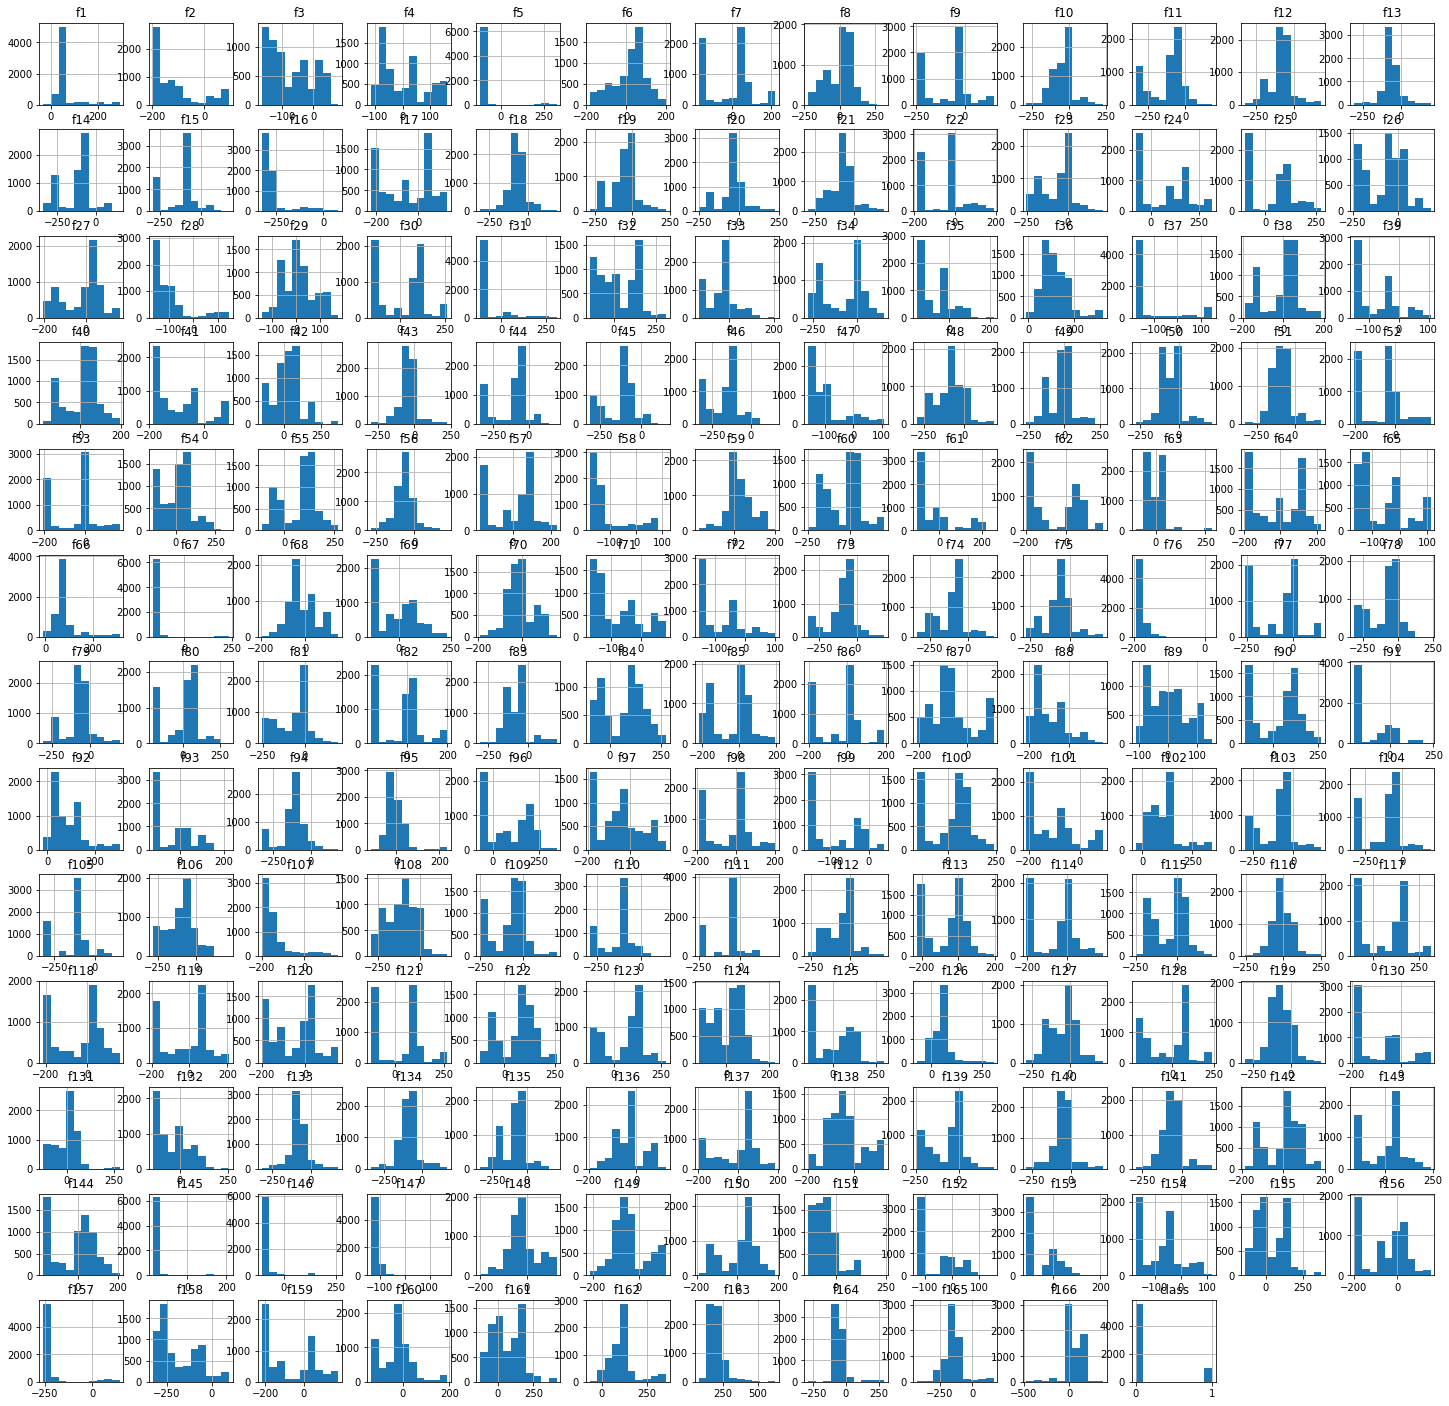

In [206]:
import matplotlib.pyplot as plt
Data.hist(figsize = (25,25))
plt.show()

# Splitting and scaling of data

In [207]:
y = Data['class'].values

X = Data.drop(columns = (['class']))

In [208]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5278, 166)
(5278,)
(1320, 166)
(1320,)


# Model Implementation

In [210]:
from keras.models import Sequential
from keras.layers import Dense

In [211]:
classifier = Sequential()
# Defining the Input layer and FIRST hidden layer
# relu means Rectifier linear unit function
classifier.add(Dense(units=10, input_dim=166, kernel_initializer='uniform', activation='relu'))

#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [212]:
ANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=20, verbose=1)

Epoch 1/20
5278/5278 [==============================] - 3s 505us/step - loss: 0.3497 - accuracy: 0.8471
Epoch 2/20
5278/5278 [==============================] - 2s 391us/step - loss: 0.2087 - accuracy: 0.9244
Epoch 3/20
5278/5278 [==============================] - 2s 389us/step - loss: 0.1583 - accuracy: 0.9483
Epoch 4/20
5278/5278 [==============================] - 2s 382us/step - loss: 0.1158 - accuracy: 0.9649
Epoch 5/20
5278/5278 [==============================] - 2s 444us/step - loss: 0.0907 - accuracy: 0.9720
Epoch 6/20
5278/5278 [==============================] - 3s 475us/step - loss: 0.0698 - accuracy: 0.9773
Epoch 7/20
5278/5278 [==============================] - 2s 401us/step - loss: 0.0567 - accuracy: 0.9803
Epoch 8/20
5278/5278 [==============================] - 2s 385us/step - loss: 0.0478 - accuracy: 0.9829
Epoch 9/20
5278/5278 [==============================] - 2s 383us/step - loss: 0.0400 - accuracy: 0.9862
Epoch 10/20
5278/5278 [==============================] - 2s 381u

# Accuracy

In [213]:
ANN_Model.history['accuracy'][-1]

0.99753696

# Testing data

In [214]:
# Predictions on testing data
Predictions=classifier.predict(X_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data)
TestingData['class']=y_test
TestingData['PredictedclassProb']=Predictions

def probThreshold(inpProb):
    if inpProb>0.1:
        return(1)
    else:
        return(0)

TestingData['Predictedclass']=TestingData['PredictedclassProb'].apply(probThreshold)
TestingData.head()

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,class,PredictedclassProb,Predictedclass
0,51.0,-116.0,-22.0,-34.0,-117.0,1.0,-163.0,62.0,-81.0,-47.0,...,-16.0,-37.0,103.0,171.0,-45.0,-117.0,116.0,0,0.000090,0
1,46.0,-191.0,-129.0,151.0,-117.0,-28.0,54.0,16.0,-31.0,-70.0,...,-24.0,153.0,123.0,201.0,-73.0,-187.0,4.0,1,0.998901,1
2,48.0,-198.0,-158.0,29.0,-117.0,-85.0,52.0,46.0,-24.0,-94.0,...,23.0,154.0,132.0,188.0,-72.0,-173.0,15.0,0,0.000062,0
3,16.0,-114.0,-21.0,38.0,-117.0,73.0,-48.0,-6.0,-128.0,-141.0,...,-26.0,-18.0,67.0,264.0,-64.0,-243.0,82.0,0,0.000919,0
4,37.0,66.0,31.0,-50.0,-115.0,37.0,-155.0,83.0,-222.0,-35.0,...,-25.0,34.0,24.0,259.0,-70.0,-249.0,-18.0,0,0.000001,0


# Accuracy metrices

In [219]:
from sklearn import metrics
print(metrics.classification_report(TestingData['class'], TestingData['Predictedclass']))
print(metrics.confusion_matrix(TestingData['class'], TestingData['Predictedclass']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1120
           1       0.93      0.99      0.96       200

    accuracy                           0.99      1320
   macro avg       0.96      0.99      0.98      1320
weighted avg       0.99      0.99      0.99      1320

[[1105   15]
 [   1  199]]


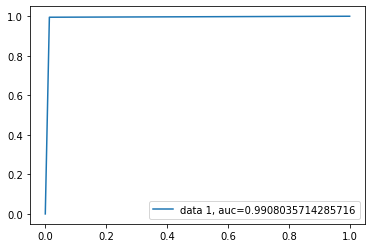

In [220]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, TestingData['Predictedclass'])
auc = roc_auc_score(y_test,TestingData['Predictedclass'])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Plotting of Accuracy and loss for train and test data

In [216]:
history = classifier.fit(X, y, validation_split=0.2, epochs=20, batch_size=10, verbose=1)

Train on 5278 samples, validate on 1320 samples
Epoch 1/20
5278/5278 [==============================] - 3s 598us/step - loss: 0.0103 - accuracy: 0.9975 - val_loss: 0.0067 - val_accuracy: 0.9985
Epoch 2/20
5278/5278 [==============================] - 3s 590us/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.0132 - val_accuracy: 0.9932
Epoch 3/20
5278/5278 [==============================] - 3s 575us/step - loss: 0.0046 - accuracy: 0.9998 - val_loss: 0.0167 - val_accuracy: 0.9917
Epoch 4/20
5278/5278 [==============================] - 3s 614us/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0097 - val_accuracy: 0.9955
Epoch 5/20
5278/5278 [==============================] - 3s 621us/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0212 - val_accuracy: 0.9909
Epoch 6/20
5278/5278 [==============================] - 3s 516us/step - loss: 0.0024 - accuracy: 0.9998 - val_loss: 0.0262 - val_accuracy: 0.9917
Epoch 7/20
5278/5278 [==============================] - 3s 555us/step - loss

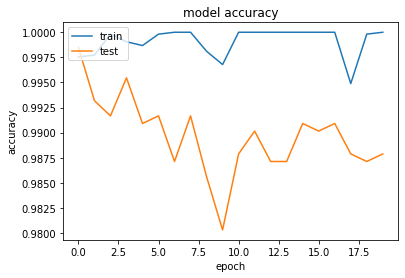

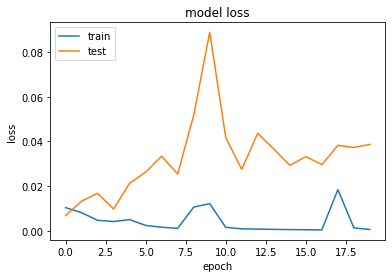

In [217]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()